<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


first of all you need to upload kaggle.json and make a folder data


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle datasets download -d "harlfoxem/housesalesprediction"

  0% 0.00/780k [00:00<?, ?B/s]
100% 780k/780k [00:00<00:00, 118MB/s]


In [ ]:
!unzip housesalesprediction.zip -d data/

Archive:  housesalesprediction.zip
  inflating: data/kc_house_data.csv  


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import plotly.express as px

from bs4 import BeautifulSoup as BS
import requests

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import  ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

import time

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [ ]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.000",3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,"538,000.000",3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,"180,000.000",2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,"604,000.000",4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,"510,000.000",3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*   A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*   Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*   Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data['date'] = data.apply(lambda x : x.date[0:8], axis=1)

In [ ]:
data['age'] = data.apply(lambda x: int(x.date[0:4]) - x.yr_built, axis=1)

In [ ]:
data['age_renovated'] = data.apply(lambda row: row.age if row.yr_renovated == 0 else int(row.date[0:4]) - row.yr_renovated, axis = 1)

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_renovated
0,7129300520,20141013,"221,900.000",3,1.000,1180,5650,1.000,0,0,...,0,1955,0,98178,47.511,-122.257,1340,5650,59,59
1,6414100192,20141209,"538,000.000",3,2.250,2570,7242,2.000,0,0,...,400,1951,1991,98125,47.721,-122.319,1690,7639,63,23
2,5631500400,20150225,"180,000.000",2,1.000,770,10000,1.000,0,0,...,0,1933,0,98028,47.738,-122.233,2720,8062,82,82
3,2487200875,20141209,"604,000.000",4,3.000,1960,5000,1.000,0,0,...,910,1965,0,98136,47.521,-122.393,1360,5000,49,49
4,1954400510,20150218,"510,000.000",3,2.000,1680,8080,1.000,0,0,...,0,1987,0,98074,47.617,-122.045,1800,7503,28,28


In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d' )
data['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,age_renovated
0,7129300520,2014-10-13,"221,900.000",3,1.000,1180,5650,1.000,0,0,...,0,1955,0,98178,47.511,-122.257,1340,5650,59,59
1,6414100192,2014-12-09,"538,000.000",3,2.250,2570,7242,2.000,0,0,...,400,1951,1991,98125,47.721,-122.319,1690,7639,63,23
2,5631500400,2015-02-25,"180,000.000",2,1.000,770,10000,1.000,0,0,...,0,1933,0,98028,47.738,-122.233,2720,8062,82,82
3,2487200875,2014-12-09,"604,000.000",4,3.000,1960,5000,1.000,0,0,...,910,1965,0,98136,47.521,-122.393,1360,5000,49,49
4,1954400510,2015-02-18,"510,000.000",3,2.000,1680,8080,1.000,0,0,...,0,1987,0,98074,47.617,-122.045,1800,7503,28,28


In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'age_renovated'],
      dtype='object')

In [ ]:
data = data[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'age', 'yr_renovated',  'age_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [ ]:
data.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,age,yr_renovated,age_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9384,3678900110,2014-06-10,"403,000.000",2,1.000,1100,3598,1.000,0,0,...,0,1926,88,0,88,98144,47.574,-122.313,1240,3598
4042,7980900011,2015-04-27,"412,450.000",3,2.000,1910,13505,1.000,0,0,...,0,1955,60,0,60,98034,47.711,-122.230,2010,8000
13810,4058801575,2014-12-17,"415,000.000",4,1.750,2230,9625,1.000,0,4,...,1050,1955,59,0,59,98178,47.508,-122.244,2300,8211
15378,7738500185,2014-09-23,"382,500.000",3,2.000,1150,6249,1.000,0,0,...,0,1952,62,2006,8,98155,47.749,-122.284,2470,7751
7497,5101404698,2014-12-15,"365,000.000",2,1.500,1200,6380,1.000,0,0,...,0,1929,85,0,85,98115,47.697,-122.319,1290,6598


In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'age', 'yr_renovated',
       'age_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [ ]:
df=data.copy()

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
age              0
yr_renovated     0
age_renovated    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  age            2161

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,age,yr_renovated,age_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000",...,"21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000","21,613.000"
mean,"4,580,301,520.865","540,088.142",3.371,2.115,"2,079.900","15,106.968",1.494,0.008,0.234,3.409,...,291.509,"1,971.005",43.318,84.402,40.937,"98,077.940",47.560,-122.214,"1,986.552","12,768.456"
std,"2,876,565,571.312","367,127.196",0.930,0.770,918.441,"41,420.512",0.540,0.087,0.766,0.651,...,442.575,29.373,29.375,401.679,28.814,53.505,0.139,0.141,685.391,"27,304.180"
min,"1,000,102.000","75,000.000",0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,...,0.000,"1,900.000",-1.000,0.000,-1.000,"98,001.000",47.156,-122.519,399.000,651.000
25%,"2,123,049,194.000","321,950.000",3.000,1.750,"1,427.000","5,040.000",1.000,0.000,0.000,3.000,...,0.000,"1,951.000",18.000,0.000,15.000,"98,033.000",47.471,-122.328,"1,490.000","5,100.000"
50%,"3,904,930,410.000","450,000.000",3.000,2.250,"1,910.000","7,618.000",1.500,0.000,0.000,3.000,...,0.000,"1,975.000",40.000,0.000,37.000,"98,065.000",47.572,-122.230,"1,840.000","7,620.000"
75%,"7,308,900,445.000","645,000.000",4.000,2.500,"2,550.000","10,688.000",2.000,0.000,0.000,4.000,...,560.000,"1,997.000",63.000,0.000,60.000,"98,118.000",47.678,-122.125,"2,360.000","10,083.000"
max,"9,900,000,190.000","7,700,000.000",33.000,8.000,"13,540.000","1,651,359.000",3.500,1.000,4.000,5.000,...,"4,820.000","2,015.000",115.000,"2,015.000",115.000,"98,199.000",47.778,-121.315,"6,210.000","871,200.000"


In [ ]:
df['persqft']= df['price'] / df['sqft_living']

In [ ]:
df['persqft']

0       188.051
1       209.339
2       233.766
3       308.163
4       303.571
          ...  
21608   235.294
21609   173.160
21610   394.217
21611   250.000
21612   318.627
Name: persqft, Length: 21613, dtype: float64

In [ ]:
df.shape

(21613, 24)

In [ ]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
age                       int64
yr_renovated              int64
age_renovated             int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
persqft                 float64
dtype: object

In [ ]:
df = df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'persqft', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'age', 'yr_renovated',
       'age_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15']]

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,persqft,floors,waterfront,...,sqft_basement,yr_built,age,yr_renovated,age_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.000",3,1.000,1180,5650,188.051,1.000,0,...,0,1955,59,0,59,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,"538,000.000",3,2.250,2570,7242,209.339,2.000,0,...,400,1951,63,1991,23,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,"180,000.000",2,1.000,770,10000,233.766,1.000,0,...,0,1933,82,0,82,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,"604,000.000",4,3.000,1960,5000,308.163,1.000,0,...,910,1965,49,0,49,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,"510,000.000",3,2.000,1680,8080,303.571,1.000,0,...,0,1987,28,0,28,98074,47.617,-122.045,1800,7503


In [ ]:
url = "https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033"
data = requests.get(url)
soup = BS(data.text,'html.parser')

In [ ]:
ZipCode_dict = {}
for i in soup.find_all(border = '3'):

    for j in i.find_all('tr'):
        k = j.find(align='left')
        if k!= None:
            zip = int(k.get_text())
            city = k.next_sibling.next_sibling.get_text()
            ZipCode_dict[zip]=city

In [ ]:
df['city'] = df["zipcode"].map(ZipCode_dict)

In [ ]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
persqft            0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
age                0
yr_renovated       0
age_renovated      0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
city             198
dtype: int64

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'persqft', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'age',
       'yr_renovated', 'age_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'city'],
      dtype='object')

In [ ]:
df = df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'persqft', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'age',
       'yr_renovated', 'age_renovated', 'zipcode', 'city', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]

In [ ]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [ ]:
df['waterfront'].value_counts(normalize=True)*100


0   99.246
1    0.754
Name: waterfront, dtype: float64

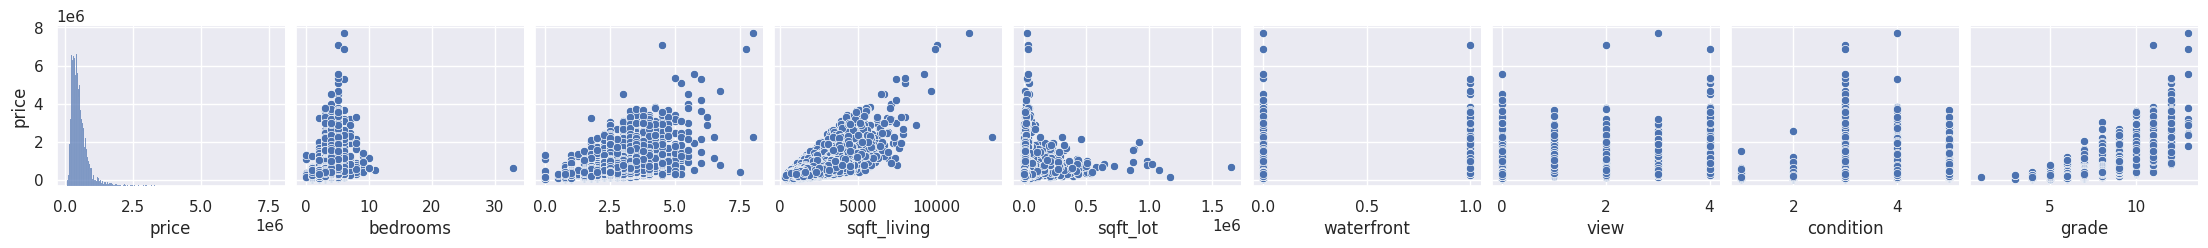

In [ ]:
sns.pairplot(data=df,
             x_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade'],
             y_vars=['price'])
plt.show()

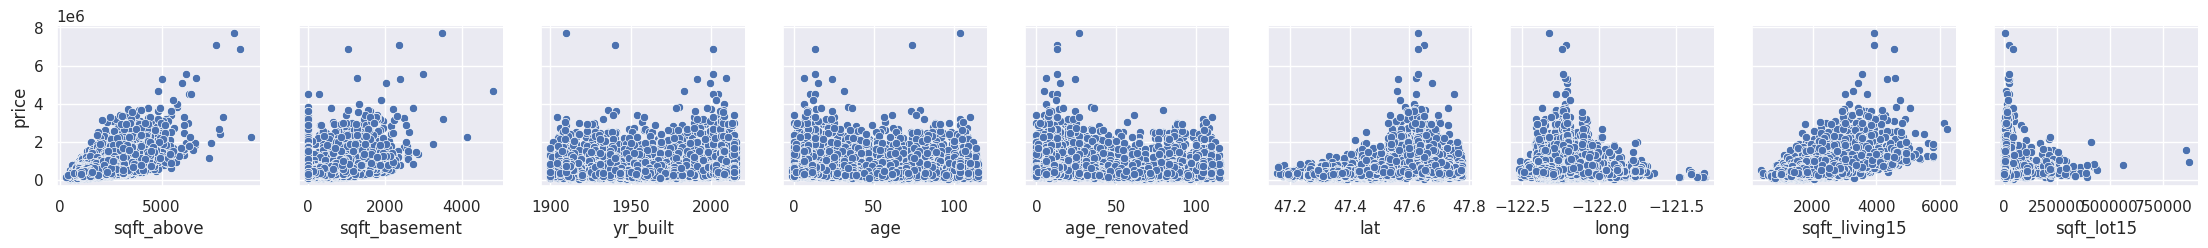

In [ ]:
sns.pairplot(data=df,
             x_vars = ['sqft_above', 'sqft_basement', 'yr_built', 'age', 'age_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
             y_vars=['price'])
plt.show()

In [ ]:
below_900 = df[ df.sqft_living <= 900 ]
len(below_900)

915

In [ ]:
df[ df.sqft_living <= 1000 ]["waterfront"].value_counts(normalize=True)*100

0   99.531
1    0.469
Name: waterfront, dtype: float64

In [ ]:
df.city.unique()

array(['Tukwila', 'Seattle', 'Bothell', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Shoreline',
       'Mercer Island', 'Kent', 'Issaquah', 'Renton', 'Vashon',
       'Yarrow Point', 'Kirkland', 'Black Diamond', 'North Bend', nan,
       'Snoqualmie', 'Enumclaw', 'Fall City', 'Woodinville', 'Carnation',
       'Medina'], dtype=object)

In [ ]:
len(df.city.unique())

26

In [ ]:
df = df[df['sqft_living'] < 5000]
df= df[ (df['persqft'] < np.quantile(df['persqft'], .95)) & (df['persqft'] > np.quantile(df['persqft'], .05))]

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df_to_plot = df.copy()
df_to_plot['bedrooms'] = df_to_plot['bedrooms'].apply(str)

In [ ]:
fig = px.scatter(df_to_plot, x="long", y="lat", color='bedrooms', size = 'price', hover_name='city',
                 labels={"bedrooms": "Number of Bedrooms"})
fig.show()

In [ ]:
bedroom_bathroom_mean_df = df.groupby(['bedrooms','waterfront'])['price'].mean().reset_index()
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
bedroom_bathroom_mean_df

,bedrooms,waterfront,price
0,0,0,"468,855.000"
1,1,0,"281,045.903"
2,1,1,"285,000.000"
3,2,0,"373,762.924"
4,2,1,"639,372.800"
5,3,0,"448,969.539"
6,3,1,"834,245.833"
7,4,0,"607,648.059"
8,4,1,"866,954.545"
9,5,0,"709,775.874"


In [ ]:
df2 = df.copy()

In [ ]:
df2.loc[:, "price"] =df["price"].map('{:,.0f}'.format)

In [ ]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,persqft,floors,waterfront,...,yr_built,age,yr_renovated,age_renovated,zipcode,city,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900",3,1.000,1180,5650,188.051,1.000,0,...,1955,59,0,59,98178,Tukwila,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,"538,000",3,2.250,2570,7242,209.339,2.000,0,...,1951,63,1991,23,98125,Seattle,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,"180,000",2,1.000,770,10000,233.766,1.000,0,...,1933,82,0,82,98028,Bothell,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,"604,000",4,3.000,1960,5000,308.163,1.000,0,...,1965,49,0,49,98136,Seattle,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,"510,000",3,2.000,1680,8080,303.571,1.000,0,...,1987,28,0,28,98074,Redmond,47.617,-122.045,1800,7503


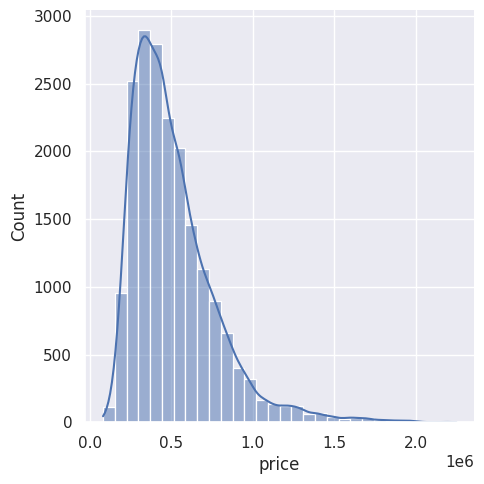

In [ ]:
sns.displot(df['price'] , bins=30 , kde=True )
plt.show()

In [ ]:
df3 = df['city'].value_counts().copy()

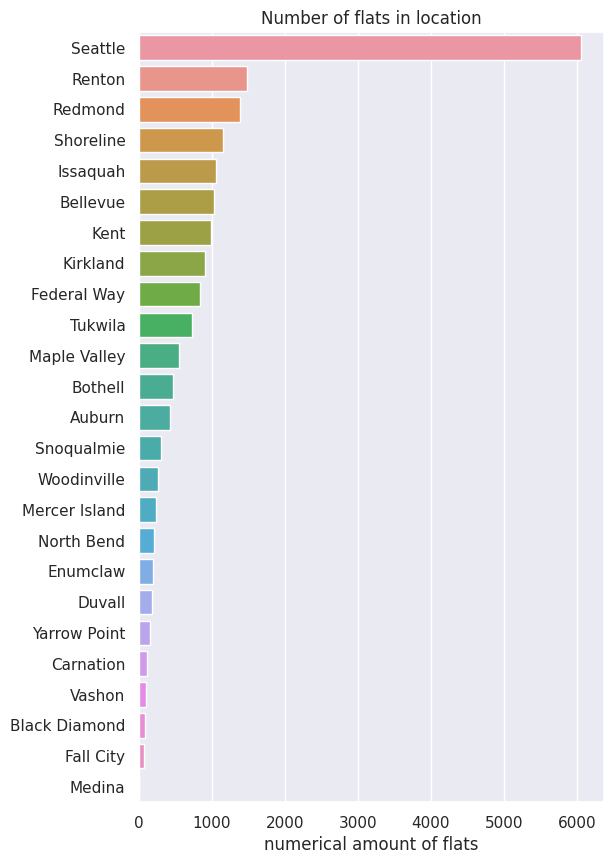

In [ ]:
fig, ax = plt.subplots(figsize=(6,10))
sns.barplot(x=df3.values, y=df3.index,ax=ax)
plt.xlabel('numerical amount of flats')
plt.title('Number of flats in location')
plt.show()

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'persqft', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'age',
       'yr_renovated', 'age_renovated', 'zipcode', 'city', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.sort_values('price',ascending=False)[['city']].head(20)

,city
695,Seattle
16751,Seattle
6190,Yarrow Point
16651,Seattle
4273,Seattle
11781,Mercer Island
3952,Issaquah
15978,Seattle
14663,Yarrow Point
17333,Yarrow Point


In [ ]:
df.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
persqft            0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
age                0
yr_renovated       0
age_renovated      0
zipcode            0
city             190
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,persqft,floors,waterfront,...,yr_built,age,yr_renovated,age_renovated,zipcode,city,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.000",3,1.000,1180,5650,188.051,1.000,0,...,1955,59,0,59,98178,Tukwila,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,"538,000.000",3,2.250,2570,7242,209.339,2.000,0,...,1951,63,1991,23,98125,Seattle,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,"180,000.000",2,1.000,770,10000,233.766,1.000,0,...,1933,82,0,82,98028,Bothell,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,"604,000.000",4,3.000,1960,5000,308.163,1.000,0,...,1965,49,0,49,98136,Seattle,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,"510,000.000",3,2.000,1680,8080,303.571,1.000,0,...,1987,28,0,28,98074,Redmond,47.617,-122.045,1800,7503


In [ ]:
skewed = df.copy().drop(['city','id','date'],axis = 1)
print(f"Skewness of features:\n{skewed.skew()}")

Skewness of features:
price            1.646
bedrooms         2.352
bathrooms        0.204
sqft_living      0.816
sqft_lot        11.141
persqft          0.563
floors           0.609
waterfront      18.464
view             3.633
condition        1.087
grade            0.670
sqft_above       1.085
sqft_basement    1.401
yr_built        -0.506
age              0.505
yr_renovated     4.700
age_renovated    0.586
zipcode          0.408
lat             -0.496
long             0.828
sqft_living15    1.007
sqft_lot15       7.610
dtype: float64


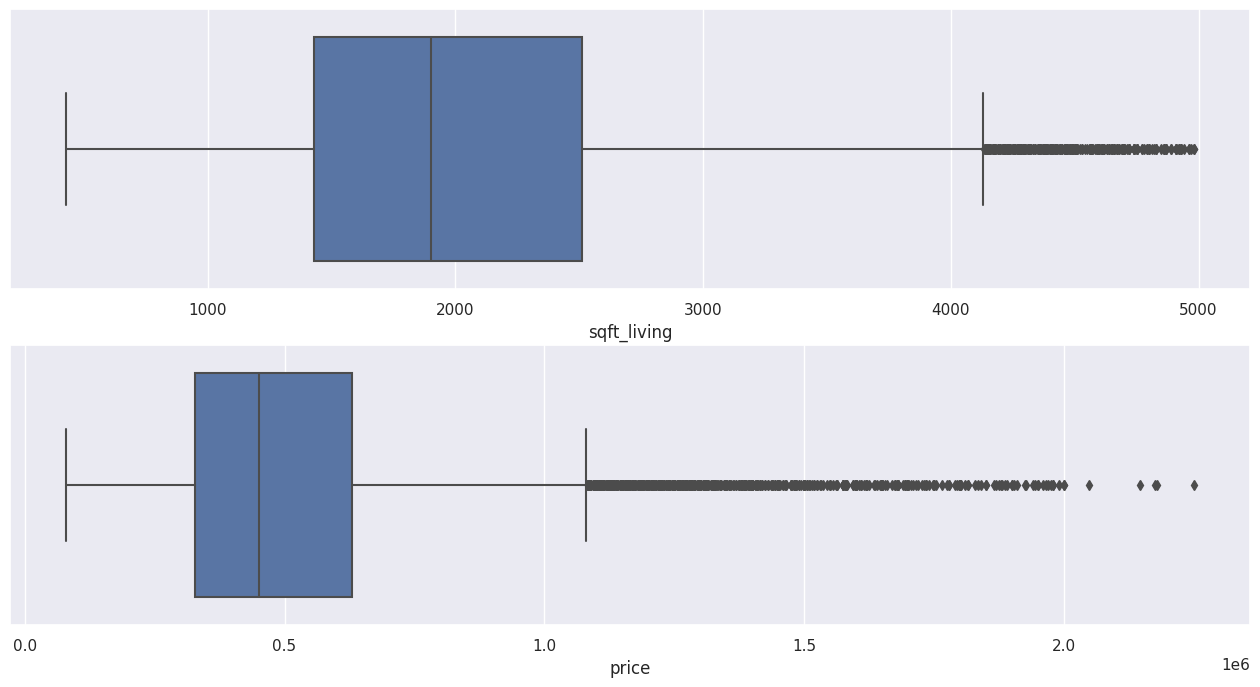

In [ ]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['sqft_living'])

plt.subplot(2,1,2)
sns.boxplot(x = df['price'])
plt.show()

In [ ]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return lower, upper

lower_area, upper_area = lower_upper(df['sqft_living'])
lower_price, upper_price = lower_upper(df['price'])

print(f"Lower limit for area: {lower_area:0.2f}")
print(f"Upper limit for area: {upper_area:0.2f}")
print(f"Lower limit for price: {lower_price:,}")
print(f"Upper limit for price: {upper_price:,}")

Lower limit for area: -190.00
Upper limit for area: 4130.00
Lower limit for price: -127,425.0
Upper limit for price: 1,084,375.0


In [ ]:
area_outliers = np.where(df['sqft_living'] > upper_area)
price_outliers = np.where(df['price'] > upper_price)
# Return the unique, sorted array of values that are in either of the two input arrays.
total_outliers = np.union1d(area_outliers, price_outliers)

print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 364
Number of price outliers: 707
Number of outliers: 861


In [ ]:
total_outliers

array([   35,    57,    58,    77,    87,    99,   155,   185,   266,
         267,   330,   340,   377,   390,   412,   413,   423,   425,
         428,   441,   447,   450,   467,   485,   490,   530,   566,
         593,   602,   613,   640,   647,   656,   674,   695,   706,
         713,   714,   734,   783,   790,   839,   846,   956,   967,
         997,  1010,  1011,  1019,  1049,  1073,  1090,  1113,  1125,
        1153,  1227,  1270,  1284,  1288,  1311,  1324,  1333,  1339,
        1362,  1366,  1387,  1413,  1415,  1453,  1499,  1521,  1543,
        1545,  1563,  1577,  1606,  1617,  1618,  1633,  1636,  1674,
        1684,  1718,  1722,  1731,  1732,  1802,  1882,  1941,  1958,
        2006,  2046,  2054,  2065,  2094,  2103,  2123,  2133,  2174,
        2180,  2185,  2189,  2231,  2273,  2274,  2321,  2341,  2429,
        2459,  2468,  2475,  2479,  2499,  2513,  2520,  2521,  2532,
        2555,  2566,  2617,  2688,  2724,  2745,  2769,  2791,  2818,
        2820,  2860,

In [ ]:
df = df.copy()
df.drop(total_outliers, inplace = True)
df.reset_index(drop = True, inplace = True)
print(f"Shape of new dataset: {df.shape}")

Shape of new dataset: (18396, 25)


In [ ]:
skewed = df.copy().drop(['city','id','date'],axis = 1)
print(f"Skewness of features after drop outliers:\n{skewed.skew()}")

Skewness of features after drop outliers:
price            0.696
bedrooms         2.545
bathrooms        0.075
sqft_living      0.585
sqft_lot        11.486
persqft          0.590
floors           0.670
waterfront      20.376
view             3.991
condition        1.070
grade            0.481
sqft_above       0.981
sqft_basement    1.363
yr_built        -0.488
age              0.487
yr_renovated     4.901
age_renovated    0.559
zipcode          0.395
lat             -0.461
long             0.840
sqft_living15    0.829
sqft_lot15       7.730
dtype: float64


<Axes: xlabel='price'>

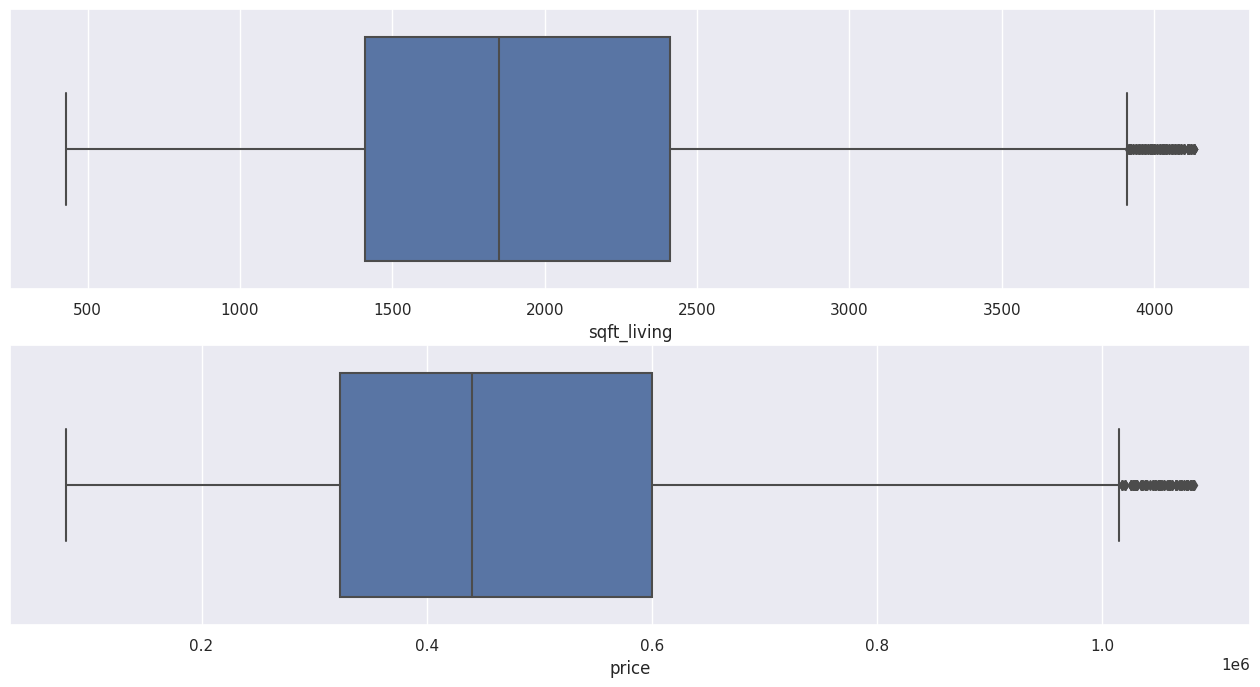

In [ ]:
plt.figure(figsize = (16,8))

plt.subplot(2,1,1)
sns.boxplot(x = df['sqft_living'])

plt.subplot(2,1,2)
sns.boxplot(x = df['price'])

In [ ]:
df_final = df.dropna()

In [ ]:
df_final.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
persqft          0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
age              0
yr_renovated     0
age_renovated    0
zipcode          0
city             0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
dummies = pd.get_dummies(df['city'],drop_first = True)
df_final = df.merge(dummies, left_index = True, right_index = True)
df_final.drop(columns = 'city', inplace = True)
df_final.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,persqft,floors,waterfront,...,North Bend,Redmond,Renton,Seattle,Shoreline,Snoqualmie,Tukwila,Vashon,Woodinville,Yarrow Point
0,7129300520,2014-10-13,"221,900.000",3,1.000,1180,5650,188.051,1.000,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,"538,000.000",3,2.250,2570,7242,209.339,2.000,0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015-02-25,"180,000.000",2,1.000,770,10000,233.766,1.000,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_final.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'persqft', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'age',
       'yr_renovated', 'age_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Bellevue', 'Black Diamond', 'Bothell',
       'Carnation', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way',
       'Issaquah', 'Kent', 'Kirkland', 'Maple Valley', 'Medina',
       'Mercer Island', 'North Bend', 'Redmond', 'Renton', 'Seattle',
       'Shoreline', 'Snoqualmie', 'Tukwila', 'Vashon', 'Woodinville',
       'Yarrow Point'],
      dtype='object')

In [ ]:
df_final.shape

(18396, 48)

# 2. Linear Regression Models


In [ ]:
X = df_final.drop(columns = ['price','id', 'date', 'zipcode'])
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(f"shape of x train: {X_train.shape}")
print(f"shape of y train: {y_train.shape}")
print(f"shape of x test: {X_test.shape}")
print(f"shape of y train: {y_test.shape}")

shape of x train: (14716, 44)
shape of y train: (14716,)
shape of x test: (3680, 44)
shape of y train: (3680,)


In [ ]:
def parameter_finder (model, parameters):
    
    start = time.time()
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
       
    return train_score, test_score, RMSE

In [ ]:
lr = LinearRegression(n_jobs = -1)

lr_train_score, lr_test_score, lr_RMSE = parameter_finder(lr, {})

The best parameters for LinearRegression model is: {}
--------------------
(R2 score) in the training set is 94.62% for LinearRegression model.
(R2 score) in the testing set is 94.67% for LinearRegression model.
RMSE is 46,183.96759596634 for LinearRegression model.
--------------------
Runtime of the program is: 0.39


In [ ]:
ridge = Ridge(random_state = 1) # Linear least squares with l2 regularization.
param_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge_train_score, ridge_test_score, ridge_RMSE = parameter_finder(ridge, param_ridge)

The best parameters for Ridge model is: {'alpha': 1}
--------------------
(R2 score) in the training set is 94.62% for Ridge model.
(R2 score) in the testing set is 94.67% for Ridge model.
RMSE is 46,184.232021086784 for Ridge model.
--------------------
Runtime of the program is: 0.62


In [ ]:
lasso = Lasso(random_state = 1) # Linear Model trained with L1 prior as regularizer.
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

lasso_train_score, lasso_test_score, lasso_RMSE = parameter_finder(lasso, param_lasso)

The best parameters for Lasso model is: {'alpha': 10}
--------------------
(R2 score) in the training set is 94.61% for Lasso model.
(R2 score) in the testing set is 94.67% for Lasso model.
RMSE is 46,204.68712041629 for Lasso model.
--------------------
Runtime of the program is: 18.20


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.481e+13, tolerance: 5.716e+10



In [ ]:
eln = ElasticNet(random_state = 1) # Linear regression with combined L1 and L2 priors as regularizer.
param_eln = {'alpha': [0.001, 0.01, 0.1, 1, 10],
            'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7]}

eln_train_score, eln_test_score, eln_RMSE = parameter_finder(eln, param_eln)

The best parameters for ElasticNet model is: {'alpha': 0.001, 'l1_ratio': 0.7}
--------------------
(R2 score) in the training set is 94.61% for ElasticNet model.
(R2 score) in the testing set is 94.67% for ElasticNet model.
RMSE is 46,211.7206384132 for ElasticNet model.
--------------------
Runtime of the program is: 83.27


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+13, tolerance: 5.716e+10



In [ ]:
dtr = DecisionTreeRegressor(random_state = 1)
param_dtr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

dtr_train_score, dtr_test_score, dtr_RMSE = parameter_finder(dtr, param_dtr)

The best parameters for DecisionTreeRegressor model is: {'min_samples_leaf': 3, 'min_samples_split': 2}
--------------------
(R2 score) in the training set is 99.97% for DecisionTreeRegressor model.
(R2 score) in the testing set is 99.82% for DecisionTreeRegressor model.
RMSE is 8,486.404562585878 for DecisionTreeRegressor model.
--------------------
Runtime of the program is: 10.08


In [ ]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [2, 3, 4, 5],
            'min_samples_leaf': [1, 2, 3]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)

The best parameters for RandomForestRegressor model is: {'min_samples_leaf': 2, 'min_samples_split': 2}
--------------------
(R2 score) in the training set is 99.99% for RandomForestRegressor model.
(R2 score) in the testing set is 99.96% for RandomForestRegressor model.
RMSE is 3,894.777618410234 for RandomForestRegressor model.
--------------------
Runtime of the program is: 549.29


In [ ]:
knr = KNeighborsRegressor(n_jobs = -1)
param_knr = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance']}

knr_train_score, knr_test_score, knr_RMSE = parameter_finder(knr, param_knr)

The best parameters for KNeighborsRegressor model is: {'n_neighbors': 10, 'weights': 'distance'}
--------------------
(R2 score) in the training set is 100.00% for KNeighborsRegressor model.
(R2 score) in the testing set is 61.09% for KNeighborsRegressor model.
RMSE is 124,818.40253067059 for KNeighborsRegressor model.
--------------------
Runtime of the program is: 15.21


In [ ]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [100,300],
             'learning_rate': [0.1,0.05],
             'subsample': [0.75],
             'colsample_bytree': [1],
             'max_depth': [3,4,5],
             'gamma': [0]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 99.96% for XGBRegressor model.
(R2 score) in the testing set is 99.95% for XGBRegressor model.
RMSE is 4,477.311891390337 for XGBRegressor model.
--------------------
Runtime of the program is: 290.87


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Assuming you have trained three different linear regression models called lr1, lr2, and lr3

# Define the base models
base_models = [('lr1', lr), ('Decision Tree', dtr), ('RandomForest', rfr), ('xgboost', xgboost)]

# Define the meta model
meta_model = LinearRegression()

# Define the stacking model
stacking_reg = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the stacking model on the data
stacking_reg.fit(X_train, y_train)

# Predict using the stacking model
y_pred = stacking_reg.predict(X_test)
stacking_train_score =stacking_reg.score(X_train, y_train)
stacking_test_score = stacking_reg.score(X_test, y_test)
stacking_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"(R2 score) in the training set is {stacking_train_score:0.2%} ")
print(f"(R2 score) in the testing set is {stacking_test_score:0.2%} ")
print(f"RMSE is {stacking_RMSE:,} ")

(R2 score) in the training set is 99.99% 
(R2 score) in the testing set is 99.97% 
RMSE is 3,674.9654438985744 


# 3. Insights and key findings


In [ ]:
models_score = pd.DataFrame({'Training score': [lr_train_score, ridge_train_score, lasso_train_score, eln_train_score, dtr_train_score, rfr_train_score, knr_train_score,xgboost_train_score,stacking_train_score],
                             'Testing score': [lr_test_score, ridge_test_score, lasso_test_score, eln_test_score, dtr_test_score, rfr_test_score, knr_test_score,xgboost_test_score,stacking_test_score],
                             'RMSE': [lr_RMSE, ridge_RMSE, lasso_RMSE, eln_RMSE, dtr_RMSE, rfr_RMSE, knr_RMSE,xgboost_RMSE,stacking_RMSE]},
                             index = ['LinearRegression', 'Ridge', 'Lasso','ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'KNeighborsRegressor','XGBoostRegressor','StackingRegressor'])

models_score

,Training score,Testing score,RMSE
LinearRegression,0.946,0.947,"46,183.968"
Ridge,0.946,0.947,"46,184.232"
Lasso,0.946,0.947,"46,204.687"
ElasticNet,0.946,0.947,"46,211.721"
DecisionTreeRegressor,1.000,0.998,"8,486.405"
RandomForestRegressor,1.000,1.000,"3,894.778"
KNeighborsRegressor,1.000,0.611,"124,818.403"
XGBoostRegressor,1.000,0.999,"4,477.312"
StackingRegressor,1.000,1.000,"3,674.965"


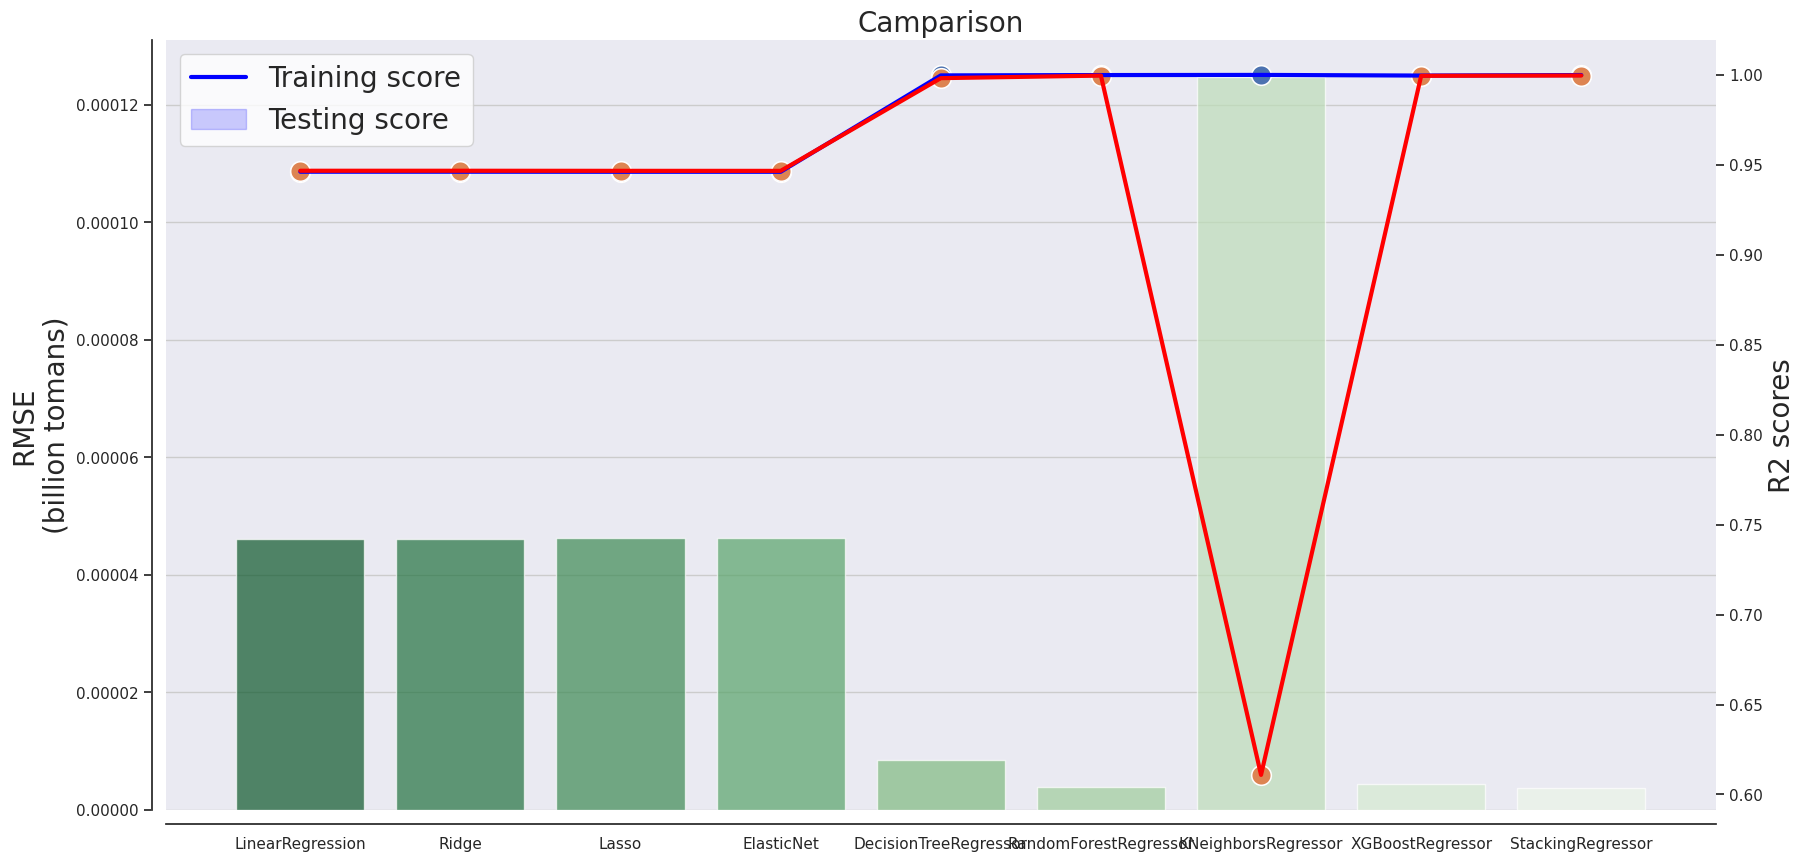

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

sns.set(style='white')

ax.set_title("Camparison", fontsize = 20)

ax = sns.barplot(x = list(models_score.index), y = models_score['RMSE']/1000000000, alpha = 0.7, palette='Greens_r')

ax.set_ylabel("RMSE\n(billion tomans)", fontsize = 20)

sec_ax = ax.twinx()

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Training score'], linewidth = 3, color = 'blue')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Training score'], s = 200)

sec_ax = sns.lineplot(x = list(models_score.index), y = models_score['Testing score'], linewidth = 3, color = 'red')
sec_ax = sns.scatterplot(x = list(models_score.index), y = models_score['Testing score'], s = 200)

sec_ax.set_ylabel("R2 scores", fontsize = 20)

sec_ax.legend(labels = ['Training score', 'Testing score'], fontsize = 20)


sns.despine(offset = 10)

plt.show()

# 4. Next Steps


In [ ]:
import pickle

# Assuming you have trained a model called `my_model`

# Save the trained model to a file
with open('Model.pkl', 'wb') as f:
    pickle.dump(stacking_reg, f)

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
